# Text and code

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

In [1]:
print('hello world')

hello world


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.ndimage import convolve
from skimage import data  # Built-in sample images from skimage
from IPython.display import display, Latex

# Load a built-in grayscale image from skimage
original_image = data.camera()  # 256x256 grayscale image
image = np.array(original_image)  # Convert to NumPy array

# Image processing function
def process_image(filter_type, blur_strength=1):
    img = image.copy()

    if filter_type == "Original":
        processed_img = img
    elif filter_type == "Inverted":
        processed_img = 255 - img
    elif filter_type == "Threshold":
        processed_img = (img > 127) * 255  # Binary thresholding
    elif filter_type == "Blur":
        processed_img = apply_blur(img, blur_strength)
    elif filter_type == "Edge Detection":
        # Simple edge detection using Sobel filters
        sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
        sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
        edge_x = convolve(img.astype(float), sobel_x, mode='constant', cval=0)
        edge_y = convolve(img.astype(float), sobel_y, mode='constant', cval=0)
        processed_img = np.sqrt(edge_x**2 + edge_y**2)
        processed_img = (processed_img / processed_img.max()) * 255  # Normalize

    # Display the original and processed images side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    axes[0].imshow(image, cmap='gray')
    axes[0].axis('off')
    axes[0].set_title("Original Image")
    
    axes[1].imshow(processed_img, cmap='gray')
    axes[1].axis('off')
    axes[1].set_title(filter_type)
    
    plt.show()

# Create widgets
filter_dropdown = widgets.Dropdown(
    options=["Original", "Inverted", "Threshold", "Blur", "Edge Detection"],
    value="Original",
    description="Filter:"
)

blur_slider = widgets.IntSlider(
    min=1, max=15, step=2, value=3
)

blur_label = widgets.Label(value=r"Blur Strength ($\sigma$):")

# Container for blur slider (initially hidden)
blur_box = widgets.VBox([blur_label, blur_slider])
blur_box.layout.display = 'none'  # Hide initially

# Function to toggle blur strength slider visibility
def update_visibility(change):
    if change['new'] == "Blur":
        blur_box.layout.display = 'block'  # Show slider
    else:
        blur_box.layout.display = 'none'  # Hide slider

filter_dropdown.observe(update_visibility, names='value')

# Display widgets and interactive output
ui = widgets.VBox([filter_dropdown, blur_box])

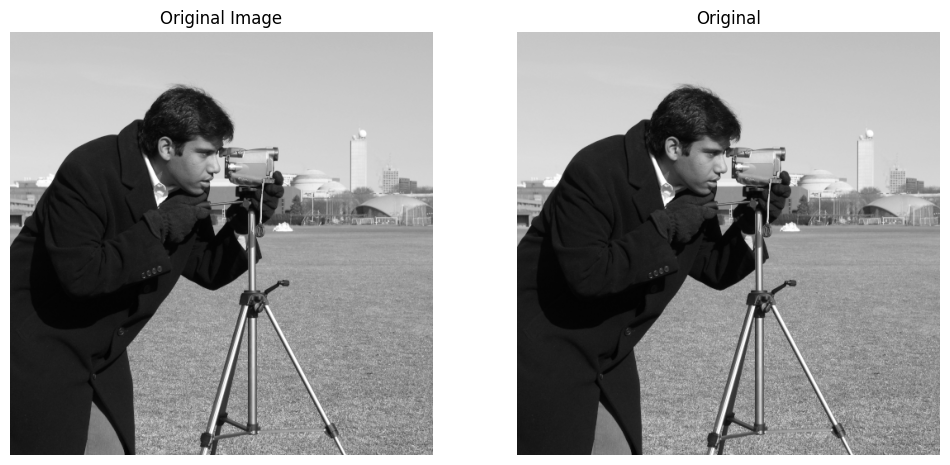

Output()

In [2]:
# Function to apply a simple blur using an averaging filter
def apply_blur(img, kernel_size):
    if kernel_size < 1:
        return img  # No blur if kernel size is less than 1
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)
    return convolve(img, kernel, mode='constant', cval=0)
    
output = widgets.interactive_output(process_image, {
    'filter_type': filter_dropdown,
    'blur_strength': blur_slider
})

display(ui, output)